In [25]:
import os
os.chdir("/home/dlhogan/MTNHYDROSUMMA") # set working directory to your own path

import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import py3dep
from pynhd import NLDI
from utils import get_spires_data
import matplotlib.pyplot as plt

In [ ]:
gage_id = "09112500"  # East River near Almont, CO
basin = NLDI().get_basins("09112500").geometry.iloc[0]
topo = py3dep.get_map(["DEM", "Slope Degrees"], basin, 500, geo_crs=4326,)

### Download 2025 data

In [14]:
get_spires_data.download_spires_data(
    year=2025,
    months=["02","03","04","05","06"],
    product="NRT",
    tile="h09v05",
    destination_base="~/data/spires")

Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250201_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250202_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250203_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250204_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250205_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250206_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250207_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250208_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250209_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250210_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250211_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250212_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250213_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250214_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250215_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250216_V1.0.nc
Downloaded: SPIRES_NRT_h09v05_MOD09GA061_20250217_V1.0.nc
Downloaded: SP

### Download 2024 Data

In [ ]:
get_spires_data.download_spires_data(
    year=2024,
    months=["02","03","04","05","06"],
    product="HIST",
    tile="h09v05",
    destination_base="~/data/spires")

### Download historic data (to do later)
Can download back to 2000

In [49]:
gage_id = "09112500"  # East River near Almont, CO
ds = xr.open_dataset("/home/dlhogan/data/spires/2025/SPIRES_NRT_h09v05_MOD09GA061_20250630_V1.0.nc")
ds_clipped = get_spires_data.clip_to_basin(ds, gage_id).squeeze()

CRS mismatch! Basin GDF CRS: EPSG:4326 Dataset CRS: PROJCS["MODIS Sinusoidal",GEOGCS["User with datum World Geodetic Survey 1984",DATUM["unnamed",SPHEROID["unnamed",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Reprojected dataset CRS: EPSG:4326


In [50]:
# reproject elevation data to match the clipped dataset
elevation_reproj = topo.elevation.rio.reproject_match(ds_clipped)
# establish elevation bands for analysis
elevation_bands = [2750, 3000, 3250, 3500, 3750, 4000]

# calculate the mean snow fraction for each elevation band
ds_clipped['elevation'] = elevation_reproj

# groupby bins and calculate mean snow fraction
mean_snow_fraction = ds_clipped.groupby_bins('elevation', bins=elevation_bands, labels=elevation_bands[:-1]).mean()

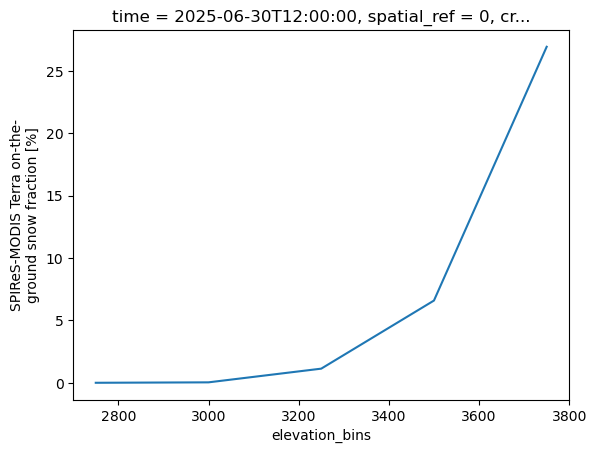

In [53]:
mean_snow_fraction['snow_fraction'].plot()